In [1]:
import numpy as np
import matplotlib.pyplot as plt

convergence par gradient en 169 iterations au point [-1.77782347 -3.        ].
convergence par gradient en 366 iterations au point [-1.77782349 -3.        ].
convergence par gradient en 158 iterations au point [-1.77782348 -3.        ].
convergence par Newton en 6 iterations au point [-1.77782348 -3.        ].


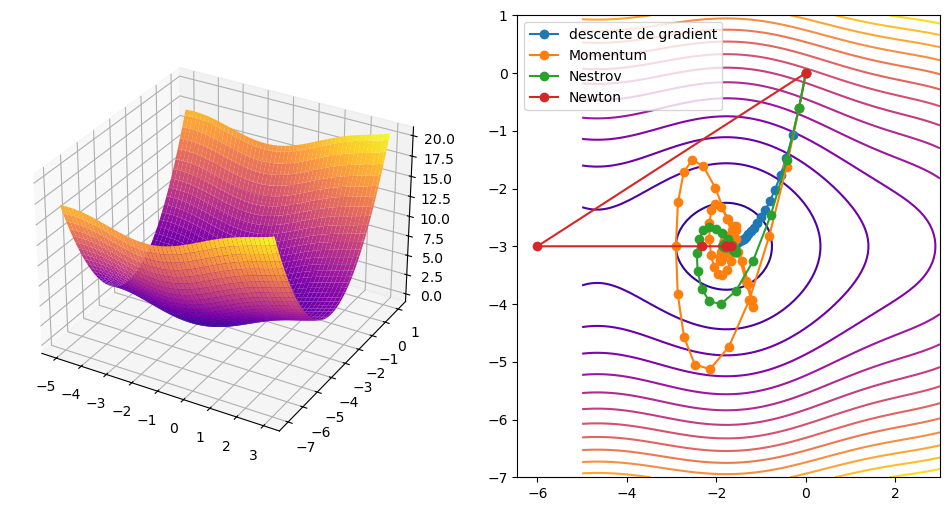

In [3]:
def f(w):
    return np.sin(w[0]) + (w[1] + 3) ** 2 + np.exp(0.5 * w[0])

def grad_f(w):
    df_dw1 = np.cos(w[0]) + 0.5 * np.exp(0.5 * w[0])
    df_dw2 = 2 * (w[1] + 3)
    return np.array([df_dw1, df_dw2])

def H(w):
    d2f_d2dw1 = -np.sin(w[0]) + 0.25 * np.exp(0.5 * w[0])
    d2f_d2dw2 = 2
    return np.array([[d2f_d2dw1, 0] , [0 , d2f_d2dw2]])

# Méthode de descente de gradient
def descente_gradient(w, alpha=0.1, n_iterations=500 , eps = 1e-8):
    # trajectoire = [w.copy()]
    # for i in range(n_iterations):
    #     w = w - alpha * grad_f(w)
    #     trajectoire.append(w.copy())
    # return np.array(trajectoire)
    trajectoire = [w.copy()]
    for i in range(n_iterations):
        grad = grad_f(w)
        if np.linalg.norm(grad) < eps:
            print(f"convergence par gradient en {i+1} iterations au point {w}.")
            break
        w = w - alpha * grad_f(w)
        trajectoire.append(w.copy())
    return np.array(trajectoire)

# Méthode de Momentum
def Momentum(w, alpha=0.1 , beta = 0.9 , n_iterations=500 , eps = 1e-8):
    trajectoire = [w.copy()]
    v = np.zeros_like(w)
    for i in range(n_iterations):
        grad = grad_f(w)
        if np.linalg.norm(grad) < eps:
            print(f"convergence par gradient en {i+1} iterations au point {w}.")
            break
        v =beta * v + grad
        w = w - alpha * v
        trajectoire.append(w.copy())
    return np.array(trajectoire)

# Méthode de Nestrov
def Nestrov(w, alpha=0.1 , beta = 0.9 , n_iterations=500 , eps = 1e-8):
    trajectoire = [w.copy()]
    v = np.zeros_like(w)
    for i in range(n_iterations):
        anticipation = w + beta * v
        grad = grad_f(anticipation)
        v =beta * v - alpha * grad
        w = w + v
        if np.linalg.norm(grad_f(w)) < eps:
            print(f"convergence par gradient en {i+1} iterations au point {w}.")
            break
        trajectoire.append(w.copy())
    return np.array(trajectoire)

# Méthode de Newton
def Newton(w , n_iterations=500 , eps = 1e-8):
    trajectoire = [w.copy()]
    for i in range(n_iterations):
        grad = grad_f(w)
        hessian = H(w)
        w = w - np.linalg.inv(hessian) @ grad
        if np.linalg.norm(grad_f(w)) < eps:
            print(f"convergence par Newton en {i+1} iterations au point {w}.")
            break
        trajectoire.append(w.copy())
    return np.array(trajectoire)

# Correction : w doit être de taille 2
w = np.array([0, 0])
trajectoires = {"descente de gradient": descente_gradient(w) , "Momentum": Momentum(w) , "Nestrov": Nestrov(w) , "Newton": Newton(w)}

# Affichage de la fonction f(w)
x1 = np.linspace(-5, 3, 100)
x2 = np.linspace(-7, 1, 100)
X, Y = np.meshgrid(x1, x2)  # Décomposons bien la grille

Z = f([X, Y])  # Correction de l'appel à f()

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection="3d")
ax1.plot_surface(X, Y, Z, cmap="plasma")

ax2 = fig.add_subplot(122)
ax2.contour(X, Y, Z, cmap="plasma", levels=20)

# Correction de l'affichage de la trajectoire
for nom, traj in trajectoires.items():
    ax2.plot(traj[:, 0], traj[:, 1], marker="o", label=nom)

ax2.legend()
plt.show()


Convergence par descente de gradient atteinte en 169 itérations avec w = [-1.77782347 -3.        ]
Convergence par Momentum atteinte en 366 itérations avec w = [-1.77782349 -3.        ]
Convergence par Nesterov atteinte en 101 itérations avec w = [-1.77782241 -3.00000015]
Convergence par Newton atteinte en 6 itérations au point [-1.77782348 -3.        ].
Convergence par Adam atteinte en 374 itérations avec w = [-1.77782349 -3.        ]


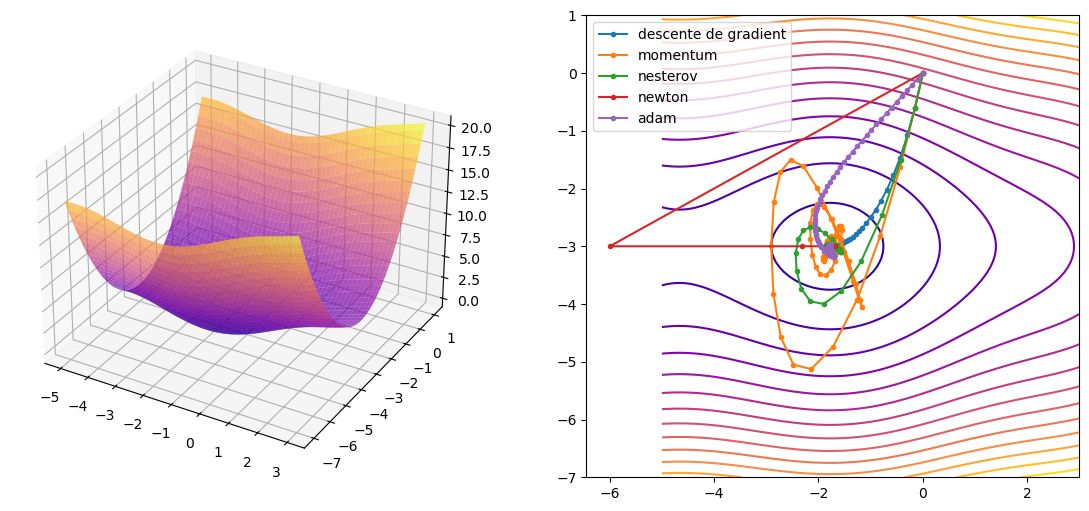

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction à optimiser
def f(w):
    return np.sin(w[0]) + (w[1] + 3) ** 2 + np.exp(0.5 * w[0])

# Gradient de f
def grad_f(w):
    df_dw1 = np.cos(w[0]) + 0.5 * np.exp(0.5 * w[0])
    df_dw2 = 2 * (w[1] + 3)  
    return np.array([df_dw1, df_dw2])

# Méthode de descente de gradient
def gradient_descent(w, alpha=0.1, n_iteration=500, eps=1e-8):
    trajectoire = [w.copy()]
    for i in range(n_iteration):
        gradient = grad_f(w)
        if np.linalg.norm(gradient) < eps:
            print(f"Convergence par descente de gradient atteinte en {i+1} itérations avec w = {w}")
            break
        w = w - alpha * gradient
        trajectoire.append(w.copy())
    return np.array(trajectoire)

# Méthode de descente avec Momentum
def momentum(w, alpha=0.1, beta=0.9, n_iteration=500, eps=1e-8):
    trajectoire = [w.copy()]
    v = np.zeros_like(w)

    for i in range(n_iteration):
        gradient = grad_f(w)
        if np.linalg.norm(gradient) < eps:
            print(f"Convergence par Momentum atteinte en {i+1} itérations avec w = {w}")
            break
        v = beta * v + gradient  # Correction de la mise à jour de v
        w = w - alpha * v
        trajectoire.append(w.copy())

    return np.array(trajectoire)

# Méthode de descente avec Nesterov
def nesterov(w, alpha=0.1, beta=0.9, n_iteration=500, eps=1e-5):
    trajectoire = [w.copy()]
    v = np.zeros_like(w)

    for i in range(n_iteration):
        anticipation = w + beta * v  # Regarder un pas en avant
        gradient = grad_f(anticipation)  # Gradient à la position avancée
        v = beta * v - alpha * gradient  # Mise à jour de la vitesse
        w = w + v  # Mise à jour de w
        if np.linalg.norm(gradient) < eps:
            print(f"Convergence par Nesterov atteinte en {i+1} itérations avec w = {w}")
            break
        trajectoire.append(w.copy())
    return np.array(trajectoire)

# Méthode de Newton
def H(w):
    d2f_d2dw1 = -np.sin(w[0]) + 0.25 * np.exp(0.5 * w[0])
    d2f_d2dw2 = 2
    return np.array([[d2f_d2dw1, 0], [0, d2f_d2dw2]])

# Méthode de Newton
def newton(w, n_iterations=500, eps=1e-8):
    trajectoire = [w.copy()]
    for i in range(n_iterations):
        grad = grad_f(w)
        hessian = H(w)
        w = w - np.linalg.inv(hessian) @ grad
        if np.linalg.norm(grad_f(w)) < eps:
            print(f"Convergence par Newton atteinte en {i+1} itérations au point {w}.")
            break
        trajectoire.append(w.copy())
    return np.array(trajectoire)

# Méthode de Adam
def Adam(w, alpha=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8, n_iterations=500, eps=1e-8):
    trajectoire = [w.copy()]
    m = np.zeros_like(w)  # Moyenne mobile des gradients
    v = np.zeros_like(w)  # Moyenne mobile des carrés des gradients
    for i in range(n_iterations):
        grad = grad_f(w)
        # Mise à jour des moyennes mobiles
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad**2
        # Correction du biais
        m_hat = m / (1 - beta1**(i + 1))
        v_hat = v / (1 - beta2**(i + 1))
        # Mise à jour de w
        w = w - alpha * m_hat / (np.sqrt(v_hat) + epsilon)
        if np.linalg.norm(grad) < eps:
            print(f"Convergence par Adam atteinte en {i+1} itérations avec w = {w}")
            break
        trajectoire.append(w.copy())
    return np.array(trajectoire)

# Point de départ de la descente de gradient
w_start = np.array([0.0, 0.0])

# Trajectoires pour les trois méthodes
trajectoires = [
    ("descente de gradient", gradient_descent(w_start.copy())),
    ("momentum", momentum(w_start.copy())),
    ("nesterov", nesterov(w_start.copy())),
    ("newton", newton(w_start.copy())),
    ("adam", Adam(w_start.copy()))
]

# Création d'une grille pour les valeurs de w
x1 = np.linspace(-5, 3, 100)
x2 = np.linspace(-7, 1, 100)
w_grid = np.meshgrid(x1, x2)
z = f(w_grid)

# Création de la figure pour afficher les graphiques
fig = plt.figure(figsize=(14, 6))

# Premier graphique : Surface 3D de la fonction f(w)
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(w_grid[0], w_grid[1], z, cmap='plasma', alpha=0.7)

# Deuxième graphique : Contours de la fonction f(w)
ax2 = fig.add_subplot(122)
ax2.contour(w_grid[0], w_grid[1], z, cmap='plasma', levels=20)

# Tracé des trajectoires sur le graphique de contours
for nom, traj in trajectoires:
    ax2.plot(traj[:, 0], traj[:, 1], marker="o", linestyle="-", markersize=3, label=nom)

ax2.legend()
plt.show()